In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
LGR_df = pd.read_csv("../../data/salmon_data/results_ave_mae_1.csv", index_col=0)
LGR_df

,Gene,ave_MAE
0,LOC100194720,1.029473
1,LOC106590330,1.041627
2,golm1,1.021446
3,LOC123732439,1.033231
4,LOC123728268,1.048587
...,...,...
695,LOC106594819,1.011300
696,LOC106611254,1.042578
697,LOC106565569,1.037301
698,ptprfa,1.022636


In [27]:
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)
GFGWA_df

,minpval
143b2,0.048587
2a5e,0.000469
4f2,0.012341
5nt1a,0.060738
5ntc,0.009990
...,...
zpr1,0.000167
zranb2,0.000016
zswim7,0.000152
zswim8,0.011779


In [28]:
# Add percentiles
LGR_df["LGR_pct"] = LGR_df["ave_MAE"].rank(pct=True, ascending=False)
LGR_df.sort_values(by="LGR_pct", ascending=False, inplace=True)
LGR_df

,Gene,ave_MAE,LGR_pct
362,LOC106566372,0.976823,1.000000
188,hba,0.978466,0.998571
113,LOC106607380,0.980119,0.997143
290,LOC106601072,0.982604,0.995714
408,duox,0.983346,0.994286
...,...,...,...
217,LOC106613254,1.043913,0.007143
78,LOC106592633,1.044028,0.005714
420,LOC106610912,1.044554,0.004286
107,LOC106587571,1.047889,0.002857


In [29]:
GFGWA_df["GFGWA_pct"] = GFGWA_df["minpval"].rank(pct=True, ascending=False)
GFGWA_df.sort_values(by="GFGWA_pct", ascending=False, inplace=True)
GFGWA_df

,minpval,GFGWA_pct
LOC106590443,4.960956e-14,1.000000
utrn,7.269689e-14,0.999959
hsd17b10,9.798417e-14,0.999918
LOC106571044,1.834140e-13,0.999877
gfra4b,2.892599e-13,0.999836
...,...,...
txndc17,4.980976e-01,0.000185
tirap,4.980976e-01,0.000185
rhno1,4.981365e-01,0.000123
LOC100286437,4.994315e-01,0.000082


In [30]:
combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_df, right_on=LGR_df["Gene"])
combined_df

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct
0,LOC106599471,8.207226e-13,0.999303,LOC106599471,1.034027,0.307143
1,slc5a11,5.613711e-12,0.997129,slc5a11,1.029196,0.505714
2,LOC106586690,9.517256e-12,0.996063,LOC106586690,1.036683,0.191429
3,lipe,6.298468e-11,0.989951,lipe,1.029206,0.504286
4,galt2,9.983815e-11,0.987859,galt2,1.020671,0.760000
...,...,...,...,...,...,...
381,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.028772,0.525714
382,LOC106594559,4.231182e-01,0.004348,LOC106594559,1.031533,0.402857
383,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.022743,0.711429
384,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.018569,0.787143


In [31]:
combined_df["mean_PCT_score"] = (combined_df["GFGWA_pct"] + combined_df["LGR_pct"])/2

In [32]:
combined_df_display = combined_df.drop('key_0', axis=1)
combined_df_display.rename(columns={'minpval': 'GFGWA_pval'})
combined_df_display.sort_values(by="mean_PCT_score", ascending=False).head(10)


,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score
12,1.240690e-09,0.971617,LOC106609359,1.002088,0.955714,0.963666
26,1.672437e-08,0.942086,si:ch211-106h4.4,0.994673,0.981429,0.961757
9,5.048503e-10,0.978959,LOC106589940,1.009737,0.905714,0.942337
15,2.349724e-09,0.965916,LOC106601015,1.007613,0.917143,0.941529
62,1.238417e-06,0.833969,LOC106602771,0.986384,0.992857,0.913413
18,5.400605e-09,0.957467,LOC100196779,1.016652,0.835714,0.896591
11,9.337759e-10,0.973709,LOC106565341,1.019812,0.775714,0.874712
4,9.983815e-11,0.987859,galt2,1.020671,0.760000,0.873930
43,1.389004e-07,0.901645,LOC106586024,1.017264,0.824286,0.862965
60,8.933971e-07,0.845700,LOC106564502,1.012392,0.880000,0.862850


In [33]:
len(combined_df["Gene"].unique())

386

In [34]:
combined_df["logminpval"] = -np.log10(combined_df["minpval"] )
combined_df

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
0,LOC106599471,8.207226e-13,0.999303,LOC106599471,1.034027,0.307143,0.653223,12.085804
1,slc5a11,5.613711e-12,0.997129,slc5a11,1.029196,0.505714,0.751422,11.250750
2,LOC106586690,9.517256e-12,0.996063,LOC106586690,1.036683,0.191429,0.593746,11.021488
3,lipe,6.298468e-11,0.989951,lipe,1.029206,0.504286,0.747118,10.200765
4,galt2,9.983815e-11,0.987859,galt2,1.020671,0.760000,0.873930,10.000703
...,...,...,...,...,...,...,...,...
381,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.028772,0.525714,0.265585,0.388432
382,LOC106594559,4.231182e-01,0.004348,LOC106594559,1.031533,0.402857,0.203602,0.373538
383,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.022743,0.711429,0.357191,0.349786
384,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.018569,0.787143,0.394781,0.339549


In [35]:
pvalthreshold = -np.log10(0.05 )
pvalthreshold

1.3010299956639813

In [36]:
priority = combined_df[combined_df["LGR_pct"] < 0.05]
priority = priority[priority["minpval"] < 0.05]
priority

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
6,LOC106586691,3.210755e-10,0.981748,LOC106586691,1.042055,0.027143,0.504445,9.493393
94,LOC106569162,9.567277e-06,0.749641,LOC106569162,1.042504,0.020000,0.384821,5.019212
202,trip6,5.078375e-04,0.496288,trip6,1.042317,0.024286,0.260287,3.294275
205,LOC100194731,5.456883e-04,0.490915,LOC100194731,1.041418,0.040000,0.265458,3.263055
218,LOC106587884,7.082421e-04,0.471433,LOC106587884,1.042354,0.022857,0.247145,3.149818
225,LOC106590330,9.897101e-04,0.444075,LOC106590330,1.041627,0.034286,0.239181,3.004492
249,LOC106580654,2.136709e-03,0.379025,LOC106580654,1.042038,0.028571,0.203798,2.670255
306,hce1,2.072064e-02,0.186539,hce1,1.041123,0.044286,0.115412,1.683597
309,LOC106569170,2.295223e-02,0.177843,LOC106569170,1.042980,0.010000,0.093922,1.639175
316,LOC100196094,2.914254e-02,0.159509,LOC100196094,1.042534,0.017143,0.088326,1.535473


In [37]:
priority_list = list(priority["key_0"].unique())
priority_list

['LOC106586691',
 'LOC106569162',
 'trip6',
 'LOC100194731',
 'LOC106587884',
 'LOC106590330',
 'LOC106580654',
 'hce1',
 'LOC106569170',
 'LOC100196094',
 'LOC100136354']

In [38]:
combined_df_without_priority = combined_df[~combined_df["key_0"].isin(priority_list)]
combined_df_without_priority

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
0,LOC106599471,8.207226e-13,0.999303,LOC106599471,1.034027,0.307143,0.653223,12.085804
1,slc5a11,5.613711e-12,0.997129,slc5a11,1.029196,0.505714,0.751422,11.250750
2,LOC106586690,9.517256e-12,0.996063,LOC106586690,1.036683,0.191429,0.593746,11.021488
3,lipe,6.298468e-11,0.989951,lipe,1.029206,0.504286,0.747118,10.200765
4,galt2,9.983815e-11,0.987859,galt2,1.020671,0.760000,0.873930,10.000703
...,...,...,...,...,...,...,...,...
381,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.028772,0.525714,0.265585,0.388432
382,LOC106594559,4.231182e-01,0.004348,LOC106594559,1.031533,0.402857,0.203602,0.373538
383,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.022743,0.711429,0.357191,0.349786
384,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.018569,0.787143,0.394781,0.339549


In [39]:
combined_priority_only = combined_df[combined_df["key_0"].isin(priority_list)]
combined_priority_only

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
6,LOC106586691,3.210755e-10,0.981748,LOC106586691,1.042055,0.027143,0.504445,9.493393
94,LOC106569162,9.567277e-06,0.749641,LOC106569162,1.042504,0.020000,0.384821,5.019212
202,trip6,5.078375e-04,0.496288,trip6,1.042317,0.024286,0.260287,3.294275
205,LOC100194731,5.456883e-04,0.490915,LOC100194731,1.041418,0.040000,0.265458,3.263055
218,LOC106587884,7.082421e-04,0.471433,LOC106587884,1.042354,0.022857,0.247145,3.149818
225,LOC106590330,9.897101e-04,0.444075,LOC106590330,1.041627,0.034286,0.239181,3.004492
249,LOC106580654,2.136709e-03,0.379025,LOC106580654,1.042038,0.028571,0.203798,2.670255
306,hce1,2.072064e-02,0.186539,hce1,1.041123,0.044286,0.115412,1.683597
309,LOC106569170,2.295223e-02,0.177843,LOC106569170,1.042980,0.010000,0.093922,1.639175
316,LOC100196094,2.914254e-02,0.159509,LOC100196094,1.042534,0.017143,0.088326,1.535473


In [40]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

In [41]:
combined_priority_only.iloc[0]["Gene"]

'LOC106586691'

In [42]:
combined_priority_only.reset_index(drop=True, inplace=True)

In [43]:
combined_priority_only.reset_index(inplace=True) # create index column for plot

In [44]:
combined_priority_only

,index,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
0,0,LOC106586691,3.210755e-10,0.981748,LOC106586691,1.042055,0.027143,0.504445,9.493393
1,1,LOC106569162,9.567277e-06,0.749641,LOC106569162,1.042504,0.020000,0.384821,5.019212
2,2,trip6,5.078375e-04,0.496288,trip6,1.042317,0.024286,0.260287,3.294275
3,3,LOC100194731,5.456883e-04,0.490915,LOC100194731,1.041418,0.040000,0.265458,3.263055
4,4,LOC106587884,7.082421e-04,0.471433,LOC106587884,1.042354,0.022857,0.247145,3.149818
5,5,LOC106590330,9.897101e-04,0.444075,LOC106590330,1.041627,0.034286,0.239181,3.004492
6,6,LOC106580654,2.136709e-03,0.379025,LOC106580654,1.042038,0.028571,0.203798,2.670255
7,7,hce1,2.072064e-02,0.186539,hce1,1.041123,0.044286,0.115412,1.683597
8,8,LOC106569170,2.295223e-02,0.177843,LOC106569170,1.042980,0.010000,0.093922,1.639175
9,9,LOC100196094,2.914254e-02,0.159509,LOC100196094,1.042534,0.017143,0.088326,1.535473


In [45]:
combined_priority_only.iloc[5]

index                        5
key_0             LOC106590330
minpval                0.00099
GFGWA_pct             0.444075
Gene              LOC106590330
ave_MAE               1.041627
LGR_pct               0.034286
mean_PCT_score        0.239181
logminpval            3.004492
Name: 5, dtype: object

/tmp/ipykernel_2638315/2470764992.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = combined_priority_only["logminpval"],


Text(0, 0.5, 'LGR percentile')

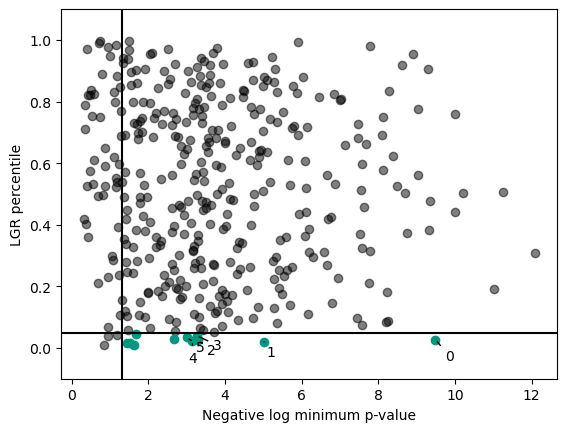

In [46]:
plt.scatter(x = combined_df_without_priority["logminpval"], 
            y = combined_df_without_priority["LGR_pct"],
            c='k',
            alpha=0.5)
plt.scatter(x = combined_priority_only["logminpval"], 
            y = combined_priority_only["LGR_pct"],
            c=light_green,
            alpha=1)
plt.axvline(x=pvalthreshold, c='k')
plt.axhline(y=0.05, c='k')
plt.ylim(-.1, 1.1)
plt.annotate(combined_priority_only.iloc[0]["index"], 
             (combined_priority_only.iloc[0]["logminpval"], 
              combined_priority_only.iloc[0]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[1]["index"], 
             (combined_priority_only.iloc[1]["logminpval"], 
              combined_priority_only.iloc[1]["LGR_pct"]), 
              textcoords="offset points", xytext=(5,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[2]["index"], 
             (combined_priority_only.iloc[2]["logminpval"], 
              combined_priority_only.iloc[2]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[3]["index"], 
             (combined_priority_only.iloc[3]["logminpval"], 
              combined_priority_only.iloc[3]["LGR_pct"]), 
              textcoords="offset points", xytext=(15,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[4]["index"], 
             (combined_priority_only.iloc[4]["logminpval"], 
              combined_priority_only.iloc[4]["LGR_pct"]), 
              textcoords="offset points", xytext=(0,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[5]["index"], 
             (combined_priority_only.iloc[5]["logminpval"], 
              combined_priority_only.iloc[5]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.xlabel("Negative log minimum p-value")
plt.ylabel("LGR percentile")